In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'signal, arb.units')

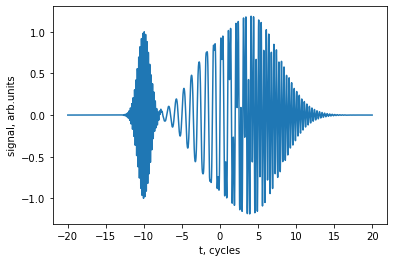

In [2]:
# generate the signal
nofts=1000
t=np.linspace(-20*2*pi, 20*2*pi, 2**14+5)
t=np.linspace(-20*2*pi, 20*2*pi, 3**9+6)
y=np.sin(t)*exp(-t**2/2/20**2)
y=y+np.sin(3*t)*exp(-(t-5*2*pi)**2/2/20**2)
y=y+np.sin(5.5*t)*exp(-(t+10*2*pi)**2/2/5**2)

plt.plot(t/2/pi,y)

xlabel('t, cycles')
ylabel('signal, arb.units')

Text(0, 0.5, 'Power spectrum, arb. units')

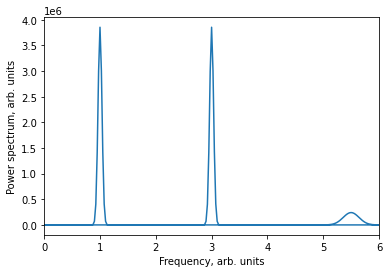

In [3]:
# Fourier spectrum
sp=np.fft.fft(y)
w=fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi)
plot(w, abs(sp)**2)
xlim(0,6)
xlabel('Frequency, arb. units')
ylabel('Power spectrum, arb. units')

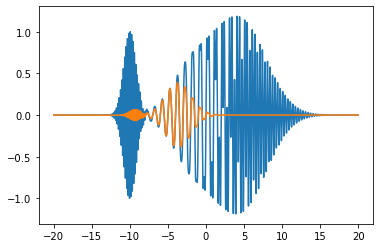

In [4]:
# windowed Fourier transform (Gabor transform, spectrogram)

window_width=2.0*2*pi
window_position=-5.0*2*pi
window_function=exp(-(t-window_position)**2/2/window_width**2)

y_window=y * window_function

plot(t/2/pi, y)
plot(t/2/pi, y_window)

# now do the same for different window positions and plot 2D graph
# x_axis is window position
# y_axis is frequency
# color axis represents the power spectrum

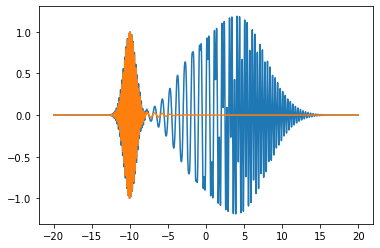

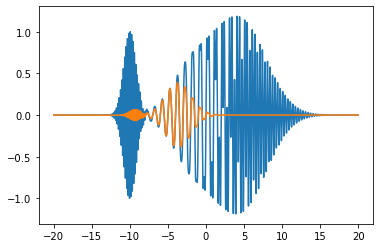

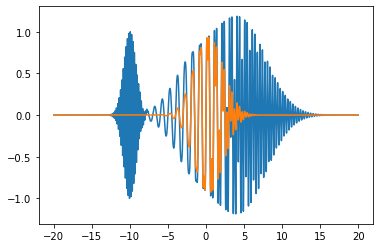

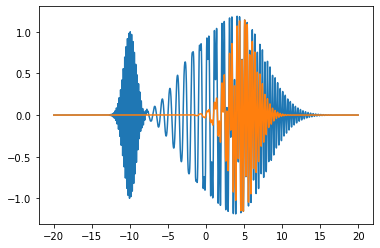

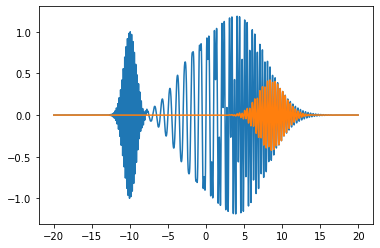

In [5]:
window_width=2.0*2*pi
window_positions = [-20 * pi, -10 * pi, 0, 10 * pi , 20 * pi ]
for window in window_positions:
    window_function=exp(-(t-window)**2/2/window_width**2)
    y_window=y * window_function
    plt.figure()
    plt.plot(t/2/pi, y)
    plt.plot(t/2/pi, y_window)
    plt.show()




In [6]:
def get_specgram(t, y, nwindowsteps=1000):

    
    specgram = []
    window_width=2.0*2*pi
    w = fft.fftfreq(len(t), d=(t[1] - t[0]) / 2 / np.pi)
    w_mask = (w >= 0) * (w <= 20)
    window_positions = np.linspace(t.min(), t.max(), nwindowsteps)      
    for window_position in window_positions:
        
        window_function=exp(-(t-window_position)**2/2/window_width**2)
        y_window = y * window_function

        sp = np.abs(fft.fft(y_window)) ** 2

#         mask = (w >= 0) * (w <= 10)
#         w = w[mask]
        sp = sp[w_mask]
        
        specgram.append(sp)
    
    return array(specgram)



Text(0.5, 1.0, ' Spectrogram')

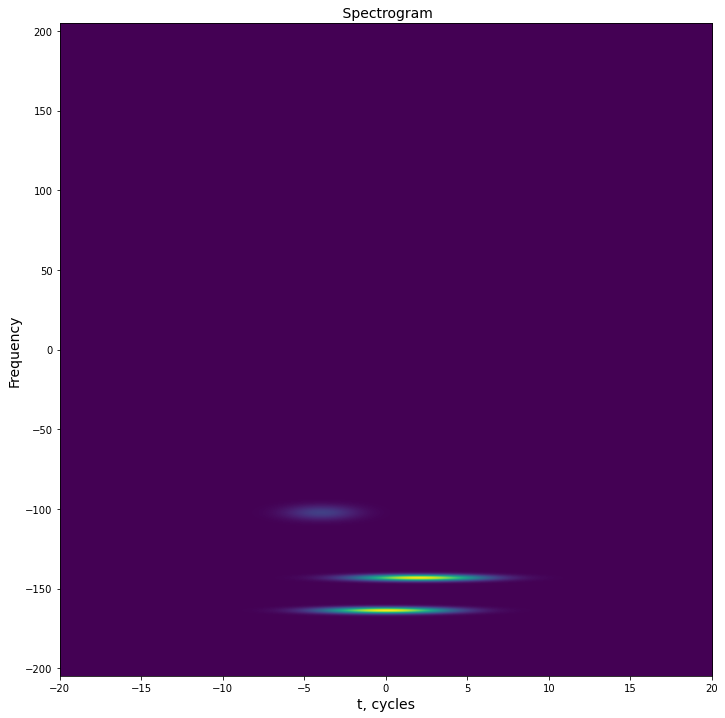

In [7]:
# plot spectrogram, explain what you see
t = np.linspace(-20 * 2 * pi, 20 * 2 * pi, 2**14)
y=np.sin(2 * t)*exp(-t**2/2/20**2)
y=y+np.sin(3*t)*exp(-(t-2*2*pi)**2/2/20**2)
y=y+np.sin(5*t)*exp(-(t+4*2*pi)**2/2/5**2) 
w = fft.fftfreq(len(t), d=(t[1] - t[0]) / 2 / np.pi)

sp = get_specgram(t, y)
plt.figure(figsize = (20, 12))
aspect = ((max(t) - min(t)) / 2 / np.pi) / (max(w) - min(w))
extent = [min(t) / 2 / np.pi, max(t) / 2 / np.pi, min(w), max(w)]
plt.imshow(sp.T, aspect=aspect, origin='lower', extent=extent)
plt.xlabel('t, cycles', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title(' Spectrogram', fontsize=14)

We can see three clouds in spectrum, corresponding to frequencies.

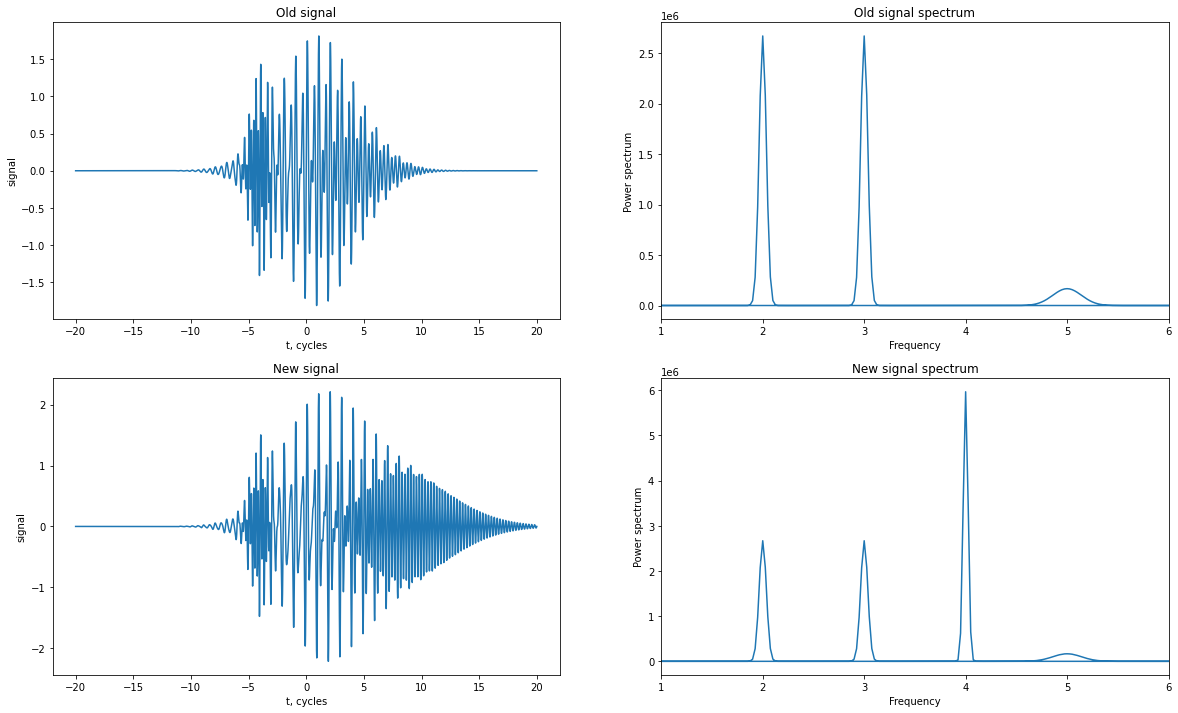

In [8]:
# Add 4th wave packet (frequency = 4 and time_shift = 7 cycles). 
# Demonstrate the effect on the plot of the FFT spectrum. (1 point)
y_new = y + np.sin(4 * t) * np.exp(-(t - 7 * 2 * np.pi) ** 2 / 2 / 30 ** 2)

fig, axes = plt.subplots(2, 2, figsize=(20, 12))

axes[0][0].plot(t / 2 / np.pi, y)
axes[0][0].set_xlabel('t, cycles')
axes[0][0].set_ylabel('signal')
axes[0][0].set_title('Old signal')

sp = np.fft.fft(y)
w = np.fft.fftfreq(len(y), d=(t[1] - t[0]) / 2 / np.pi)
axes[0][1].plot(w, abs(sp) ** 2)

axes[0][1].set_xlim(1,6)
axes[0][1].set_xlabel('Frequency')
axes[0][1].set_ylabel('Power spectrum')
axes[0][1].set_title('Old signal spectrum')

axes[1][0].plot(t / 2 / np.pi, y_new)
axes[1][0].set_xlabel('t, cycles')
axes[1][0].set_ylabel('signal')
axes[1][0].set_title('New signal')

sp_new = np.fft.fft(y_new)
w_new = np.fft.fftfreq(len(y_new), d=(t[1] - t[0]) / 2 / np.pi)
axes[1][1].plot(w_new, abs(sp_new) ** 2)

axes[1][1].set_xlim(1,6)
axes[1][1].set_xlabel('Frequency')
axes[1][1].set_ylabel('Power spectrum')
axes[1][1].set_title('New signal spectrum')

plt.show()

In [9]:
# Implement the spectrogram, show the effect of (1) on the spectrogram. Don’t forget to label the axes (2 points)
spec1 = get_specgram(t, y)
spec2 = get_specgram(t, y_new)


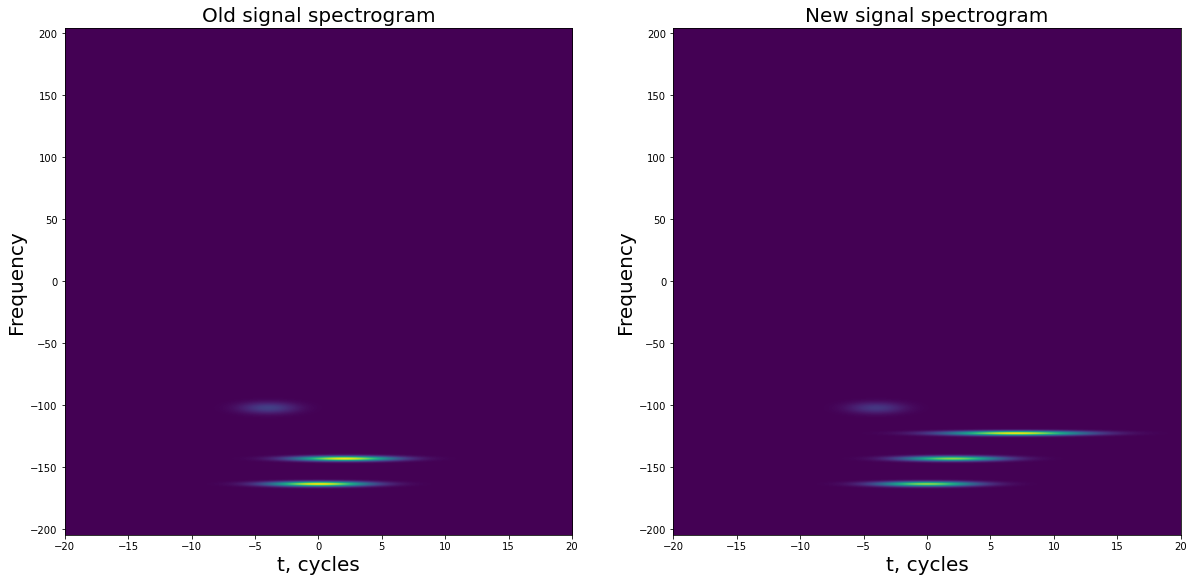

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(20, 12))

axes[0].imshow(spec1.T, aspect=aspect, origin='lower', extent=extent)
axes[0].set_xlabel('t, cycles', fontsize=20)
axes[0].set_ylabel('Frequency', fontsize=20)
axes[0].set_title('Old signal spectrogram', fontsize=20)

axes[1].imshow(spec2.T, aspect=aspect, origin='lower', extent=extent)
axes[1].set_xlabel('t, cycles', fontsize=20)
axes[1].set_ylabel('Frequency', fontsize=20)
axes[1].set_title('New signal spectrogram', fontsize=20)

plt.show()

In [11]:
# Change the number of time steps in your signal to the power of 2 (i.e. 2**14)
# and then slightly change the number of timesteps (i.e 2**14 +- 5).
# Measure the timing, can you explain the difference? Write something as a possible explanation. (2 points)

In [12]:
t = np.linspace(-20 * 2 * pi, 20 * 2 * pi, 2**14)
y=np.sin(2 * t)*exp(-t**2/2/20**2)
y=y+np.sin(3*t)*exp(-(t-2*2*pi)**2/2/20**2)
y=y+np.sin(5*t)*exp(-(t+4*2*pi)**2/2/5**2) 

res = %timeit -o get_specgram(t, y)

500 ms ± 10.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
t = np.linspace(-20 * 2 * pi, 20 * 2 * pi, 2**14+5)
y=np.sin(2 * t)*exp(-t**2/2/20**2)
y=y+np.sin(3*t)*exp(-(t-2*2*pi)**2/2/20**2)
y=y+np.sin(5*t)*exp(-(t+4*2*pi)**2/2/5**2) 

res = %timeit -o get_specgram(t, y)

2.14 s ± 117 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Power of 2 is far more convenient for FFT because of its recursion and splitting into subproblems of half size. When $N = 2^k$ there are less operations needed: [original algorithm](http://people.scs.carleton.ca/~maheshwa/courses/5703COMP/16Fall/FFT_Report.pdf)
$$
\begin{array}{rlr}
x[n] & \leftarrow\left(x[n]+x\left[n+\frac{N}{2}\right]\right) & k=2 m \\
x\left[n+\frac{N}{2}\right] & \leftarrow\left(x[n]-x\left[n+\frac{N}{2}\right]\right) e^{-j 2 \pi n / N} & k=2 m+1
\end{array}
$$